In [26]:
import sys, os
sys.path.append('..')

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import preprocess

In [32]:
orig_df = pd.read_csv('../data/exhibition_behavior_preprocessed.csv', delimiter=',', index_col=False)

In [33]:
orig_df

,uid,date,filename,start,duration,A/C,behavior,code,M/F,appearance
0,0,11월 19일,01_20221119085958_part2,56240,2720,Child,물리적거리,Approach,Female,"포니테일, 아이보리색 점퍼, 검정색 바지"
1,0,11월 19일,01_20221119085958_part2,59360,2960,Child,상호작용시도,None,Female,"포니테일, 아이보리색 점퍼, 검정색 바지"
2,0,11월 19일,01_20221119085958_part2,71420,5520,Child,물리적거리,Approach,Female,"포니테일, 아이보리색 점퍼, 검정색 바지"
3,0,11월 19일,01_20221119085958_part2,77400,6320,Child,상호작용시도,None,Female,"포니테일, 아이보리색 점퍼, 검정색 바지"
4,1,11월 19일,01_20221119085958_part2,48240,9240,Child,물리적거리,Approach,Male,"검정색 점퍼, 청바지, 검정/흰색 운동화"
...,...,...,...,...,...,...,...,...,...,...
2682,371,12월 4일,01_20221204165959_part1,2567280,17280,Child,물리적거리,Pass,Female,"하늘색 롱패딩, 흰색 바지"
2683,371,12월 4일,01_20221204165959_part1,2893760,14160,Child,물리적거리,Pass,Female,"하늘색 롱패딩, 흰색 바지"
2684,372,12월 4일,01_20221204165959_part1,2567280,18080,Adult,물리적거리,Pass,Male,"검은색 롱패딩, 검은색 바지"
2685,373,12월 4일,01_20221204165959_part2,15760,13840,Child,물리적거리,Pass,Female,"하늘색 롱패딩, 흰색 바지"


# 1. 전처리할 데이터 만들기

In [34]:
orig_df = preprocess.indexing(orig_df)
orig_df = preprocess.reindex(orig_df)

    uid     date                 filename   start  duration    A/C behavior  \
0     0  11월 19일  01_20221119085958_part2   56240      2720  Child    물리적거리   
1     0  11월 19일  01_20221119085958_part2   59360      2960  Child   상호작용시도   
2     0  11월 19일  01_20221119085958_part2   71420      5520  Child    물리적거리   
3     0  11월 19일  01_20221119085958_part2   77400      6320  Child   상호작용시도   
4     1  11월 19일  01_20221119085958_part2   48240      9240  Child    물리적거리   
5     1  11월 19일  01_20221119085958_part2   56640     15600  Child   상호작용시도   
6     1  11월 19일  01_20221119085958_part2   71200      5920  Child    물리적거리   
7     1  11월 19일  01_20221119085958_part2   77400      6360  Child   상호작용시도   
8     2  11월 19일  01_20221119085958_part2    3000     21040  Child    물리적거리   
9     2  11월 19일  01_20221119085958_part2  238160      4160  Child    물리적거리   
10    2  11월 19일  01_20221119085958_part2  242320      7760  Child   상호작용시도   
11    3  11월 19일  01_20221119085958_part2  233440   

In [80]:
scores = {'Pass': 1, 'Follow': 2, 'Avoid': 2, 'Approach': 3, 
          'None': 4, 'Touch': 5, 'Gesture': 5}
orig_df = preprocess.map_code_score(orig_df, scores)

In [81]:
orig_df

,uid,pid,date,filename,start,duration,A/C,behavior,code,M/F,appearance,code_score
0,0,0,11월 19일,01_20221119085958_part2,56240,2720,Child,물리적거리,Approach,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",3
1,0,0,11월 19일,01_20221119085958_part2,59360,2960,Child,상호작용시도,None,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",4
2,0,1,11월 19일,01_20221119085958_part2,71420,5520,Child,물리적거리,Approach,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",3
3,0,1,11월 19일,01_20221119085958_part2,77400,6320,Child,상호작용시도,None,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",4
4,1,2,11월 19일,01_20221119085958_part2,48240,9240,Child,물리적거리,Approach,Male,"검정색 점퍼, 청바지, 검정/흰색 운동화",3
...,...,...,...,...,...,...,...,...,...,...,...,...
2682,371,1116,12월 4일,01_20221204165959_part1,2567280,17280,Child,물리적거리,Pass,Female,"하늘색 롱패딩, 흰색 바지",1
2683,371,1117,12월 4일,01_20221204165959_part1,2893760,14160,Child,물리적거리,Pass,Female,"하늘색 롱패딩, 흰색 바지",1
2684,372,1118,12월 4일,01_20221204165959_part1,2567280,18080,Adult,물리적거리,Pass,Male,"검은색 롱패딩, 검은색 바지",1
2685,373,1119,12월 4일,01_20221204165959_part2,15760,13840,Child,물리적거리,Pass,Female,"하늘색 롱패딩, 흰색 바지",1


In [82]:
df = orig_df[['pid', 'duration', 'A/C', 'M/F', 'code', 'code_score']]

In [83]:
def make_data(df):
    df = df.groupby('pid').agg({'code': list, 'duration': list, 'code_score': list, 'A/C': 'first', 'M/F': 'first'})
    df = df.drop(df[df['code'].apply(lambda x: len(x) <= 1)].index)
    df['code_count'] = [len(x) for x in df['code']]
    df.reset_index(inplace=True)
    return df

In [84]:
df = make_data(df)

In [85]:
df

,pid,code,duration,code_score,A/C,M/F,code_count
0,0,"[Approach, None]","[2720, 2960]","[3, 4]",Child,Female,2
1,1,"[Approach, None]","[5520, 6320]","[3, 4]",Child,Female,2
2,2,"[Approach, None]","[9240, 15600]","[3, 4]",Child,Male,2
3,3,"[Approach, None]","[5920, 6360]","[3, 4]",Child,Male,2
4,5,"[Approach, None]","[4160, 7760]","[3, 4]",Child,Male,2
...,...,...,...,...,...,...,...
684,1108,"[Approach, None, Gesture, None]","[7680, 5200, 2800, 2400]","[3, 4, 5, 4]",Child,Male,4
685,1109,"[Approach, None, Gesture, None, Gesture, None]","[5360, 45360, 1840, 36400, 6320, 62800]","[3, 4, 5, 4, 5, 4]",Child,Male,6
686,1110,"[Approach, None]","[3840, 11680]","[3, 4]",Child,Male,2
687,1111,"[Approach, None]","[4800, 16480]","[3, 4]",Child,Male,2


# 2. engagement score 계산하기

In [86]:
def cal_engagement_score(df):
    engagement_scores = []
    for i in df.index:
        engagement_score = []
        for code_score, time_ratio in zip(df['code_score'][i], df['duration'][i]):
            engagement_score.append(code_score * time_ratio)
        engagement_scores.append(sum(engagement_score))

    df['engagement_score'] = engagement_scores

    return df

In [87]:
df = cal_engagement_score(df)

In [88]:
df = preprocess.normalize(df, 'engagement_score')

In [89]:
df

,pid,code,duration,code_score,A/C,M/F,code_count,engagement_score,norm_engagement_score
0,0,"[Approach, None]","[2720, 2960]","[3, 4]",Child,Female,2,20000,1.253851
1,1,"[Approach, None]","[5520, 6320]","[3, 4]",Child,Female,2,41840,3.209859
2,2,"[Approach, None]","[9240, 15600]","[3, 4]",Child,Male,2,90120,7.533854
3,3,"[Approach, None]","[5920, 6360]","[3, 4]",Child,Male,2,43200,3.331662
4,5,"[Approach, None]","[4160, 7760]","[3, 4]",Child,Male,2,43520,3.360321
...,...,...,...,...,...,...,...,...,...
684,1108,"[Approach, None, Gesture, None]","[7680, 5200, 2800, 2400]","[3, 4, 5, 4]",Child,Male,4,67440,5.502615
685,1109,"[Approach, None, Gesture, None, Gesture, None]","[5360, 45360, 1840, 36400, 6320, 62800]","[3, 4, 5, 4, 5, 4]",Child,Male,6,635120,56.344487
686,1110,"[Approach, None]","[3840, 11680]","[3, 4]",Child,Male,2,58240,4.678656
687,1111,"[Approach, None]","[4800, 16480]","[3, 4]",Child,Male,2,80320,6.656158


In [90]:
def draw_dist_score(df):
    sns.scatterplot(x='pid', y='norm_engagement_score', data=df)
    plt.title('Distribution of Normalized Engagement Scores')
    plt.show()

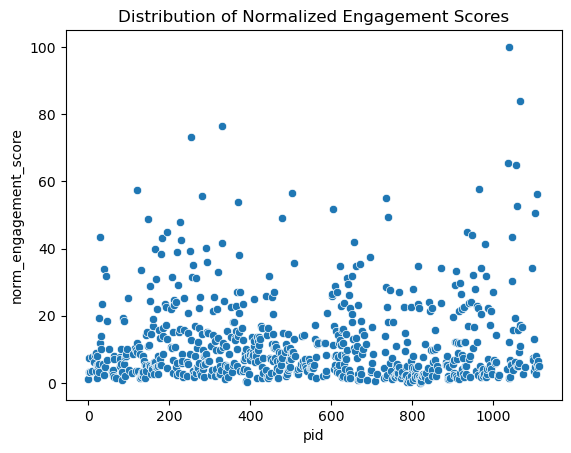

In [91]:
draw_dist_score(df)

In [92]:
df

,pid,code,duration,code_score,A/C,M/F,code_count,engagement_score,norm_engagement_score
0,0,"[Approach, None]","[2720, 2960]","[3, 4]",Child,Female,2,20000,1.253851
1,1,"[Approach, None]","[5520, 6320]","[3, 4]",Child,Female,2,41840,3.209859
2,2,"[Approach, None]","[9240, 15600]","[3, 4]",Child,Male,2,90120,7.533854
3,3,"[Approach, None]","[5920, 6360]","[3, 4]",Child,Male,2,43200,3.331662
4,5,"[Approach, None]","[4160, 7760]","[3, 4]",Child,Male,2,43520,3.360321
...,...,...,...,...,...,...,...,...,...
684,1108,"[Approach, None, Gesture, None]","[7680, 5200, 2800, 2400]","[3, 4, 5, 4]",Child,Male,4,67440,5.502615
685,1109,"[Approach, None, Gesture, None, Gesture, None]","[5360, 45360, 1840, 36400, 6320, 62800]","[3, 4, 5, 4, 5, 4]",Child,Male,6,635120,56.344487
686,1110,"[Approach, None]","[3840, 11680]","[3, 4]",Child,Male,2,58240,4.678656
687,1111,"[Approach, None]","[4800, 16480]","[3, 4]",Child,Male,2,80320,6.656158


In [93]:
df.to_csv("../data/behavior_with_duration.csv", index=False)

In [98]:
min([len(x) for x in df['code']])

2

In [99]:
max([len(x) for x in df['code']])

22